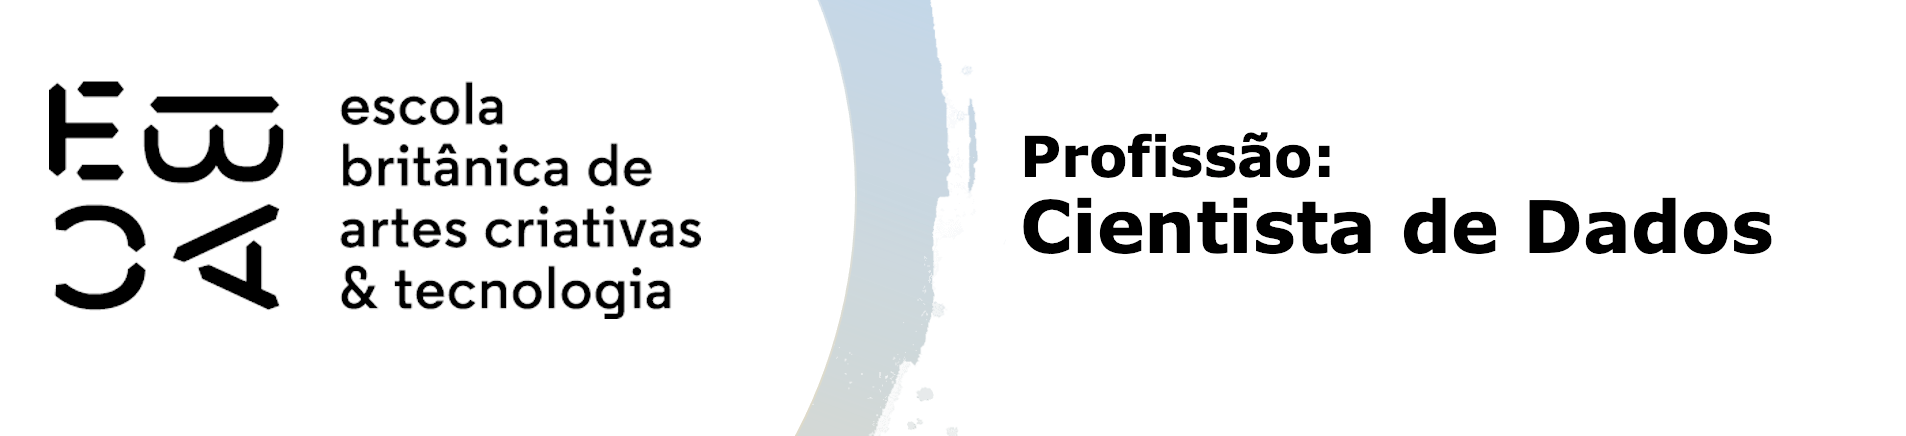

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [3]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [11]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

labels = clus.fit_predict(peng_pad)


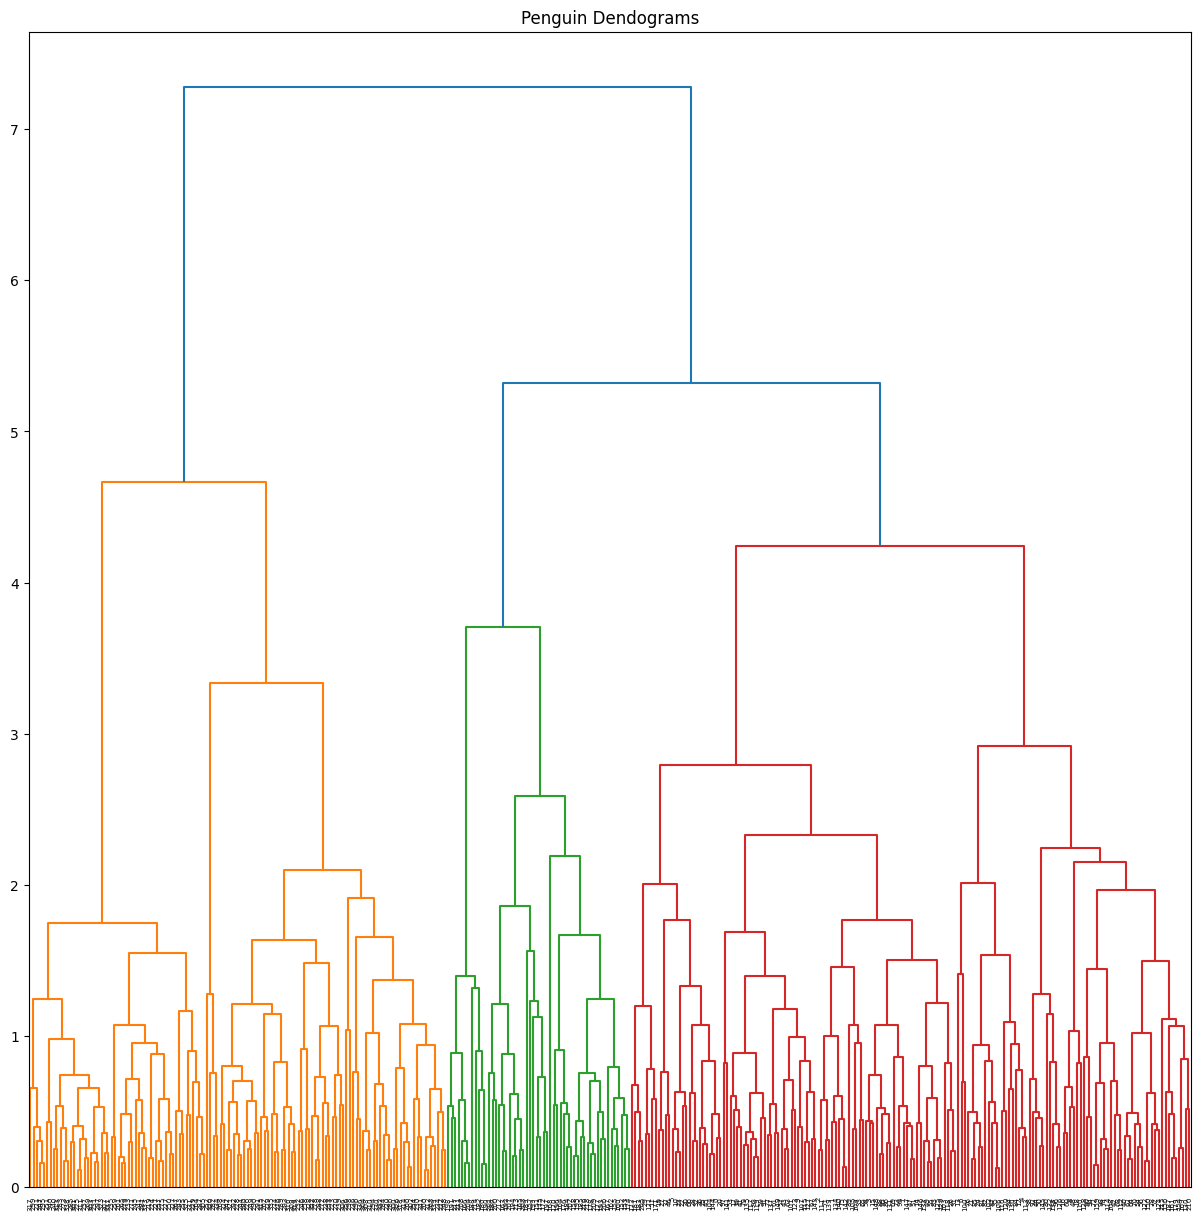

In [6]:
plt.figure(figsize=(15, 15))

plt.title("Penguin Dendograms")

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [15]:
peng['cluster'] = pd.Series(labels, index=peng_num.index)

cluster_counts = peng['cluster'].value_counts()

print(cluster_counts)

cluster
1.0    165
0.0    123
2.0     54
Name: count, dtype: int64


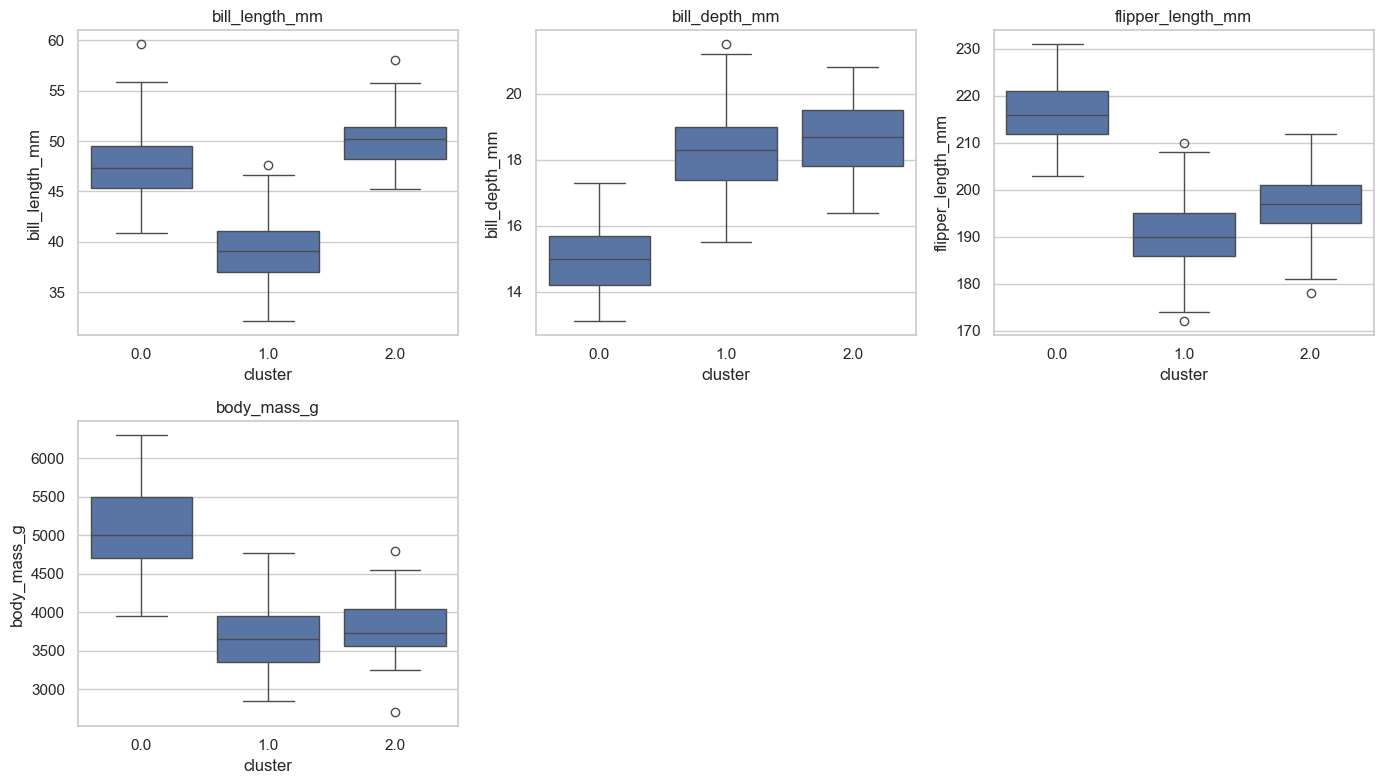

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Gráficos de boxplot para cada variável quantitativa
for i, col in enumerate(peng_num.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='cluster', y=col, data=peng)
    plt.title(col)

plt.tight_layout()
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [22]:
from scipy.cluster.hierarchy import fcluster

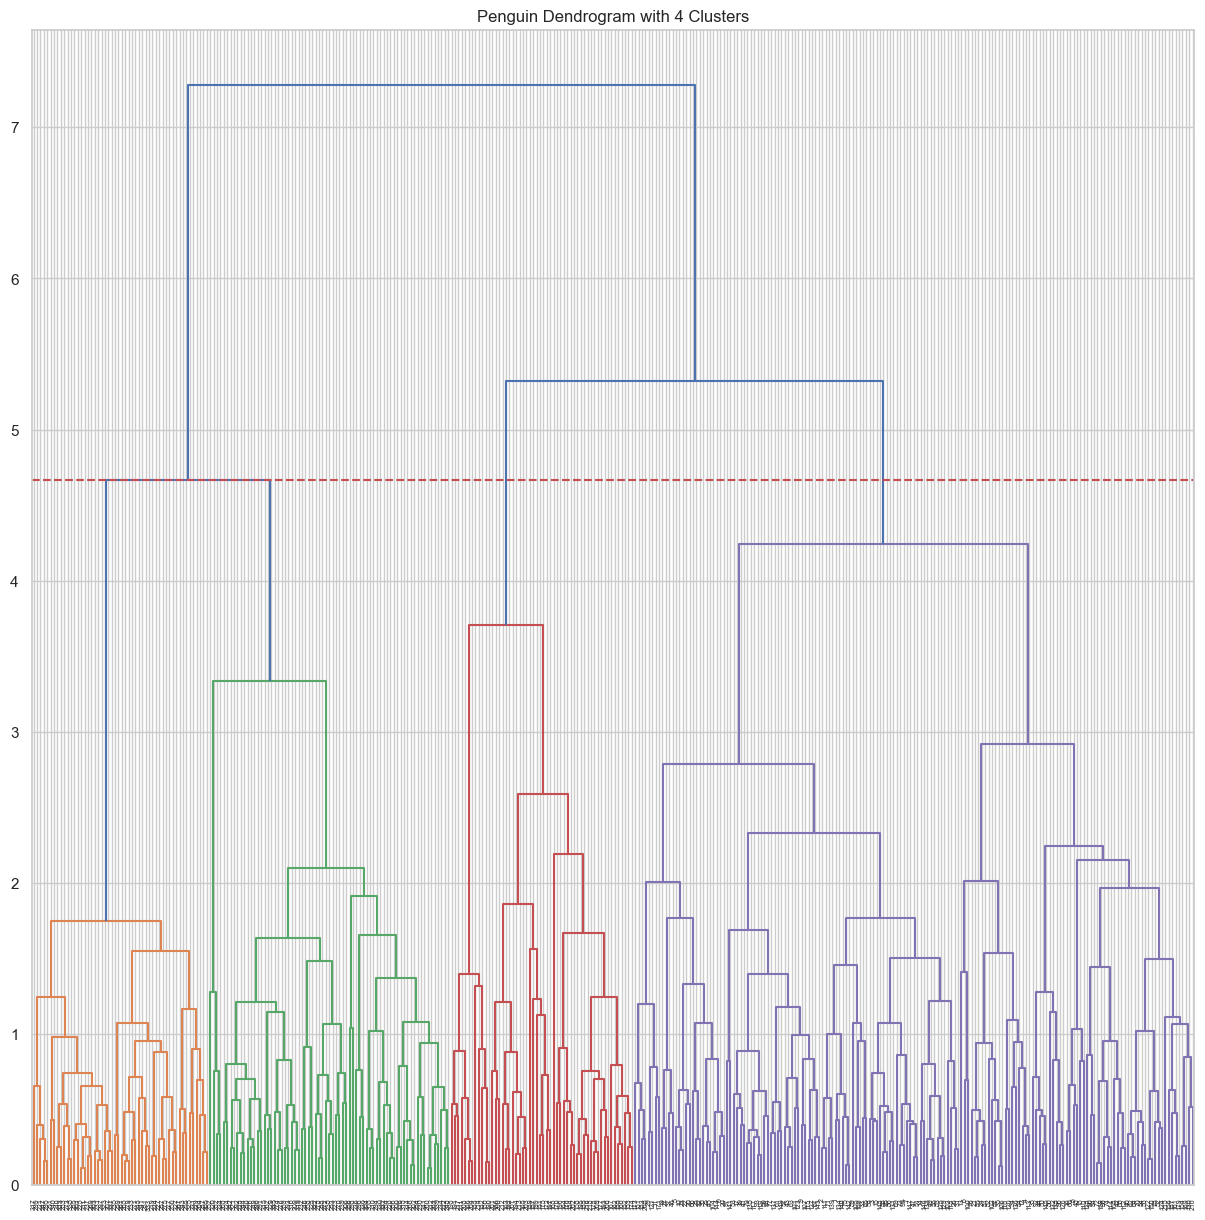

Número de pinguins em cada grupo:
cluster
4.0    165
2.0     71
3.0     54
1.0     52
Name: count, dtype: int64
Quantidade de machos e fêmeas em cada grupo:
sex      Female  Male
cluster              
1.0          49     0
2.0           9    61
3.0          20    34
4.0          87    73


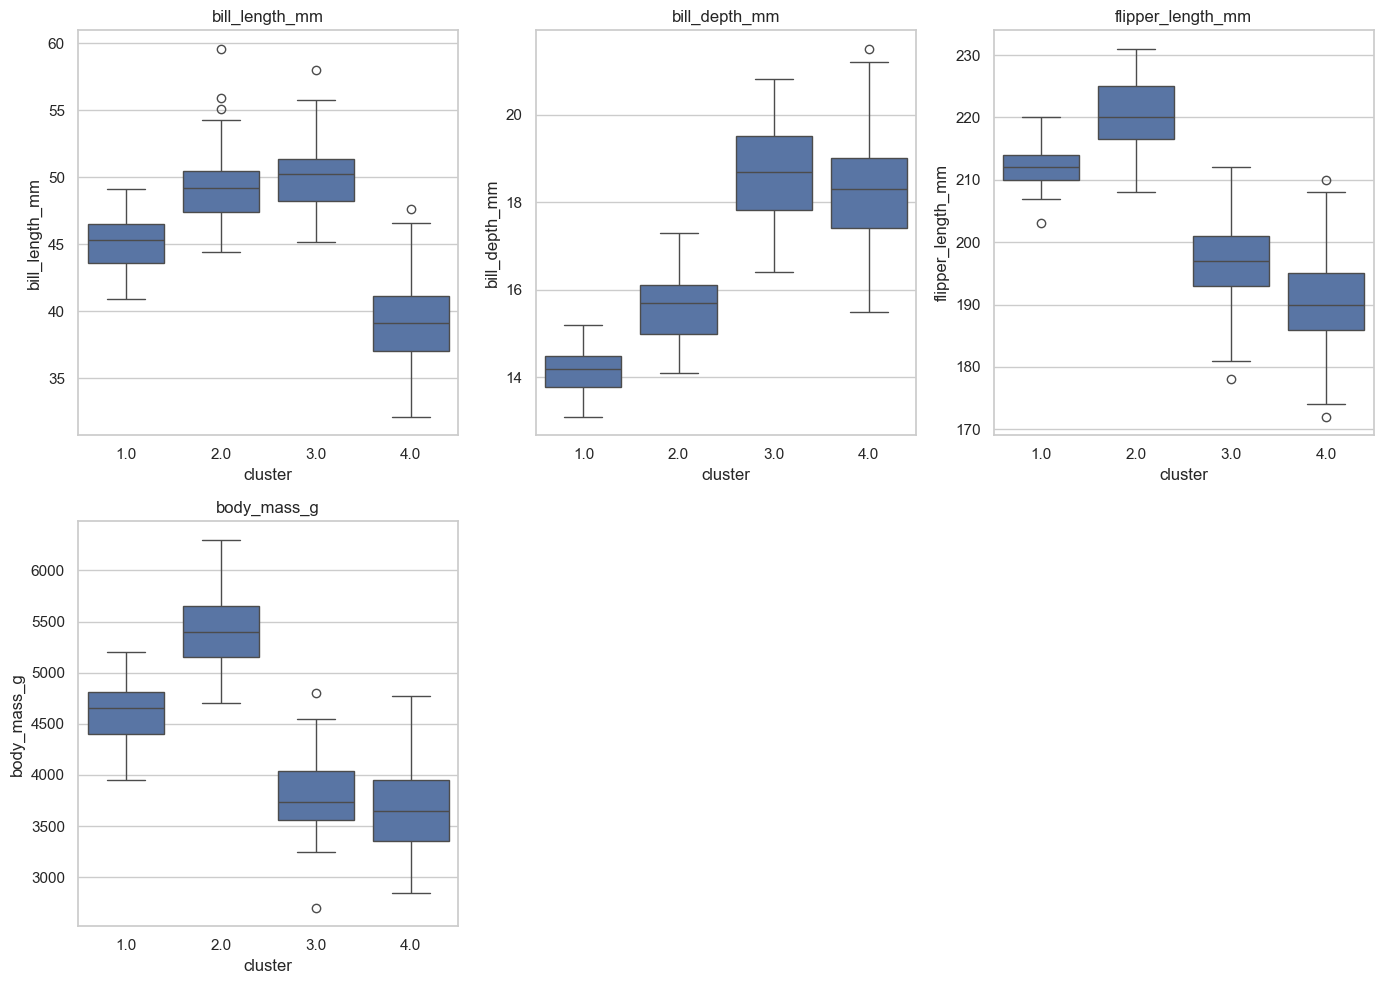

In [31]:
#Fazendo um dendrograma com 4 grupos:

linkage_matrix = shc.linkage(peng_pad, method='complete')

num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

peng['cluster'] = pd.Series(clusters, index=peng_num.index)

# Visualizar o dendrograma 
plt.figure(figsize=(15, 15))
plt.title("Penguin Dendrogram with 4 Clusters")
dend = shc.dendrogram(linkage_matrix, color_threshold=linkage_matrix[-num_clusters + 1, 2], p=num_clusters)
plt.axhline(y=linkage_matrix[-num_clusters + 1, 2], color='r', linestyle='--')
plt.show()

# Quantos pinguins em cada grupo
cluster_counts = peng['cluster'].value_counts()
print("Número de pinguins em cada grupo:")
print(cluster_counts)

# Quantidade de machos e fêmeas em cada grupo
gender_counts = peng.groupby(['cluster', 'sex']).size().unstack(fill_value=0)
print("Quantidade de machos e fêmeas em cada grupo:")
print(gender_counts)

# Gráficos de boxplot para cada variável quantitativa
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

for i, col in enumerate(peng_num.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='cluster', y=col, data=peng)
    plt.title(col)

plt.tight_layout()
plt.show()